<a href="https://colab.research.google.com/github/vivekmaurya92/encryptix_internshipTasks/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[**TASK-1: Credit Card Fraud Detection**]

> Author: Vivek kr Maurya

> Batch: aug-sep2024

> Domain: Data Science

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
df = pd.read_csv("/content/advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


from matplotlib import pyplot as plt
_df_0['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
df.shape

(200, 4)

In [5]:
df.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


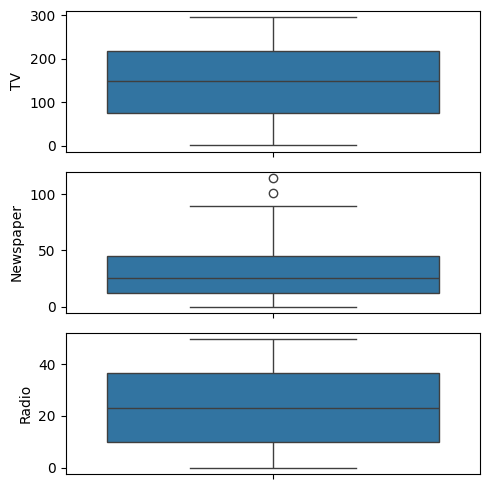

In [9]:
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

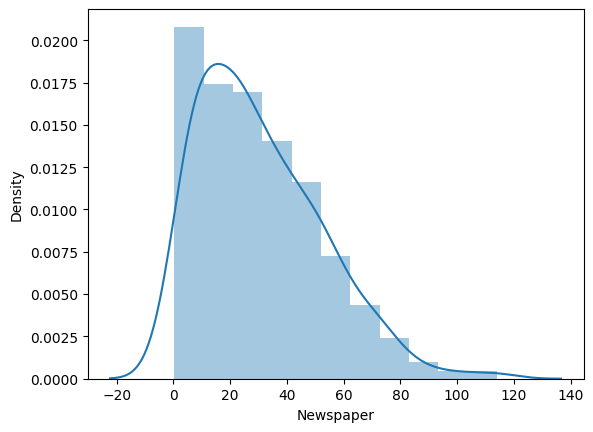

In [10]:
sns.distplot(df['Newspaper'])

In [11]:
iqr = df['Newspaper'].quantile(0.75) - df['Newspaper'].quantile(0.25)

In [12]:
lower_bound = df['Newspaper'].quantile(0.25) - (1.5 * iqr)
upper_bound = df['Newspaper'].quantile(0.75) + (1.5 * iqr)

In [13]:
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -35.775000000000006
Upper Bound: 93.625


In [14]:
data =df.copy()

In [15]:
data.loc[data['Newspaper'] > upper_bound, 'Newspaper'] = upper_bound

<Axes: ylabel='Newspaper'>

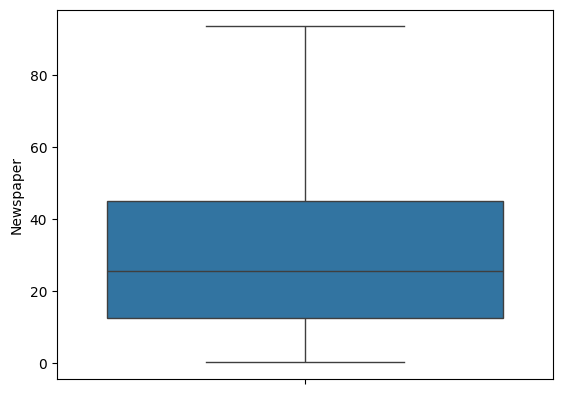

In [16]:
sns.boxplot(data['Newspaper'])

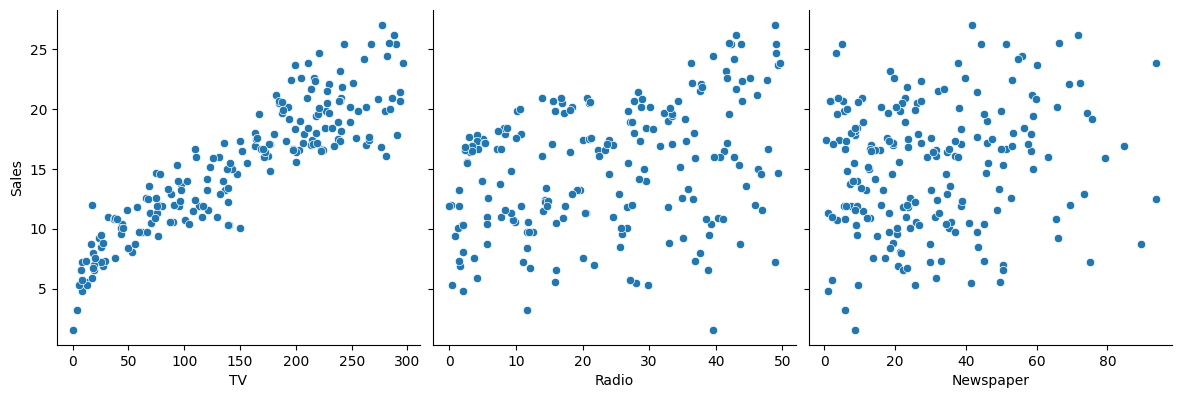

In [17]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

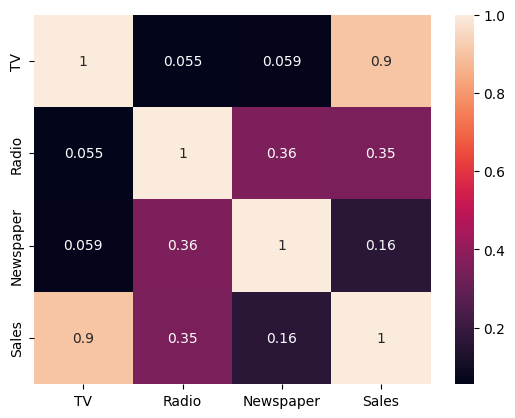

In [18]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [19]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [20]:
print(important_features)

['TV', 'Sales']


In [21]:
x = data['TV']
y = data['Sales']

In [22]:
x = x.values.reshape(-1,1)

In [23]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [24]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [25]:
print(x.shape)
print(y.shape)

(200, 1)
(200,)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [27]:
print(x_train.shape)
print(y_train.shape)

(134, 1)
(134,)


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)


In [30]:
print(knn_train_pred)
print(knn_test_pred)

[16.7  21.02 18.66  7.92 12.02 19.34  8.46  9.38  7.22  7.18 19.52  8.4
  5.9  19.72 12.66  9.7   7.18 17.3  18.04 16.38 16.68 10.36  5.9  13.02
 12.7  11.72 16.46 20.16 21.9   5.92  9.48 20.1  11.88  8.76  9.38 19.22
 19.72 20.3   9.82  7.92 11.88 19.44 20.54 12.38  8.4   9.72 12.66 12.94
 18.7  21.5   7.18 20.96 16.46 22.3   9.56 22.3  11.18 17.02 17.86 19.52
 21.02  7.92 12.38 11.88 20.18 19.52 20.34 19.48 19.64 17.3  12.66  8.4
 11.72 18.56 16.7  21.68 11.18 16.7  13.12 11.88 18.7  16.7  19.52 21.68
 22.3  13.22 13.12  7.18 10.12 20.16 20.16 20.96 20.86 21.9  16.9  11.72
 12.44 17.3   7.22 12.66 22.06 15.16 19.34 13.02 20.16 19.62 21.52 22.34
 21.22 18.66 23.38 13.22  5.16 13.12 11.18 21.68 19.52 20.54 13.22 19.44
 12.66  5.9  12.44  9.56 18.62 20.1  10.36 20.34 10.9  13.12 11.72 20.3
 13.22 20.54]
[13.04 12.88 13.66 20.1  12.7  17.74 19.52  9.7  12.66  5.9  11.72 20.3
 12.44 20.16 11.72  5.9  19.44 12.36 12.2  11.18 12.66 17.74 17.86 18.62
 19.56 13.62 22.3  19.82 20.16 13.62 13.1

In [31]:
Results = pd.DataFrame(columns=["Model","train R2","test R2","test RMSE","Variance"])

In [32]:
r2 = r2_score(y_train, knn_train_pred)
r2_train = r2_score(y_test, knn_test_pred)
rmse = np.sqrt(mean_squared_error(y_train, knn_train_pred))
variance = r2_train-r2
pd.concat([Results,pd.DataFrame({"Model":"KNN","train R2":r2,"test R2":r2_train,"test RMSE":rmse,"Variance":variance},index=[0])],ignore_index=True)

print("R2:",r2)
print("RMSE:",rmse)

R2: 0.8607833064075305
RMSE: 2.0359866873446832


In [33]:
Results.head()

,Model,train R2,test R2,test RMSE,Variance


In [34]:
svr = SVR().fit(x_train, y_train)
svr


SVR()

In [35]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [36]:
import matplotlib.pyplot as plt


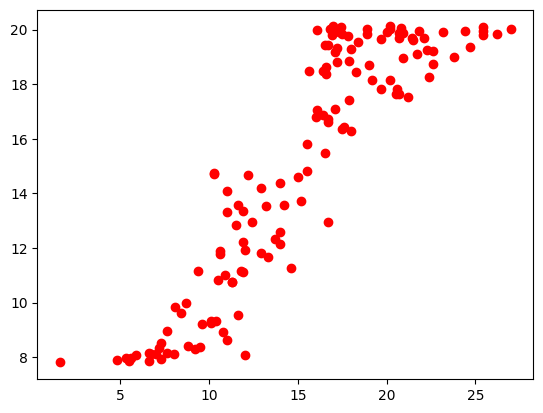

In [37]:
plt.scatter(y_train, svr_train_pred,color='red')